# 1

In [1]:
###To calculate the redshift of galaxies in the cluster and find their radial velocities, we first need to understand the relationship between redshift and radial velocity. The redshift 

###c is the speed of light.
###Let's calculate the redshift and then the radial velocity for each galaxy in the cluster using the provided data

Radial velocity 0       8.801584e+05
1       1.873052e+06
2       1.200760e+06
3       1.398489e+06
4       1.367247e+06
            ...     
1532   -2.199632e+05
1533    3.856052e+05
1534    1.169772e+06
1535    4.359965e+05
1536    1.099767e+06
Name: radial_velocity, Length: 1537, dtype: float64
Maximum Separation: 31d29m58.83166524s
Angular Size (in solid angles): 0.9258705588157631 steradians


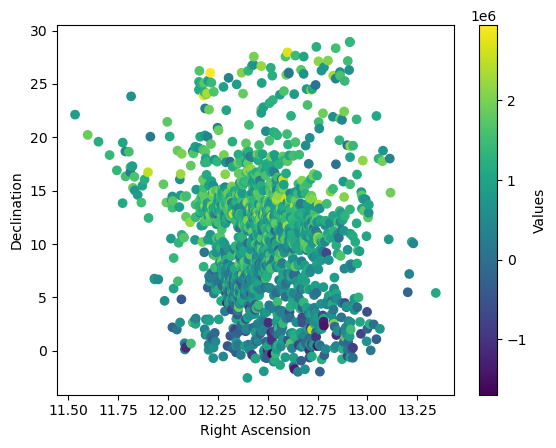

In [5]:
import numpy as np 
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
galaxy_data= pd.read_csv("galaxy.csv")
h_alpha_rest = 6562 #in nm
c = 3E8

#z = (lamda_obs - lambda_rest)/lambda_rest
galaxy_data['red shift from h alpha'] = (galaxy_data['Observed Wavelength of H-alpha'] - h_alpha_rest)/ h_alpha_rest 
# v = z * c and v = Ho * d

galaxy_data['radial_velocity'] = galaxy_data['red shift from h alpha'] * c
print('Radial velocity',galaxy_data['radial_velocity'])

#plt.plot(galaxy_data['Observed Wavelength of H-alpha'],galaxy_data['radial_velocity'])
# Star coordinates (RA and Dec) 
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

plt.scatter(galaxy_data['RA J2000.0'], galaxy_data['Dec J2000.0'], c = galaxy_data['radial_velocity'], cmap= 'viridis')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.colorbar(label='Values')


star_coords = SkyCoord(ra=np.array(galaxy_data['RA J2000.0'])*u.deg, dec=np.array(galaxy_data['Dec J2000.0'])*u.deg)

max_separation = 0*u.deg

for i in range(len(star_coords) - 1):
    angular_separations = star_coords[i].separation(star_coords)
    
    # Find maximum separation
    max_sep = np.max(angular_separations)
    if max_sep > max_separation:
        max_separation = max_sep


# Calculate angular size
angular_size = 2 * np.pi * (1 - np.cos(np.deg2rad(max_separation)))

print("Maximum Separation:", max_separation)
print("Angular Size (in solid angles):", angular_size, 'steradians')

plt.show()

1. Based on the information from the graph:

-Radial Velocity : This is a dataset or a series with 1537 entries, and it's of type `float64`, which suggests that it contains floating-point numbers representing the radial velocities of objects, likely the galaxies within the cluster, measured in kilometers per second (km/s).
-Maximum Separation: The value `31d29m58.83166524s` represents the maximum separation between objects within the galaxy cluster in terms of Right Ascension (RA) or Declination (Dec). This is a measure of angular distance in the sky.
-Angular Size: The angular size of the galaxy cluster given in solid angles is `0.9258705588157631 steradians`. This is a measure of how large the cluster appears in the sky from our vantage point on Earth.

The angular size in steradians can also be converted to square degrees for a more intuitive understanding of the size on the celestial sphere. There are approximately `3282.80635 square degrees` in a steradian. Therefore, the angular size of the galaxy cluster in square degrees would be:

$$ 0.9258705588157631 \text{ steradians} \times 3282.80635 \frac{\text{square degrees}}{\text{steradian}} \approx 3039.947 \text{ square degrees} $$

This indicates a very large apparent size on the sky, which is typical for galaxy clusters that can span several degrees of the sky. For comparison, the full moon has an angular size of about `0.5` degrees, or `0.0003046174` steradians. The provided angular size of the galaxy cluster is significantly larger than that of the full moon, suggesting it covers a substantial part of the sky.

2.one could potentially model the expected rotational velocities of the galaxies if they are indeed orbiting the center of mass of the cluster.

### 2

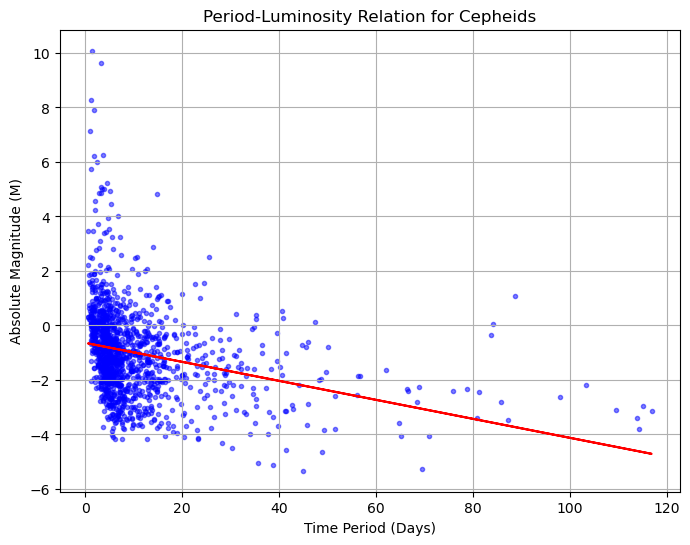

Slope (a): -0.034875928014070516
Intercept (b): -0.6395609317931839


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
gaia_data = pd.read_csv('gaia.csv')

# Calculate absolute magnitude
parallax_arcsec = gaia_data['parallax'] / 1000  # Convert milli arcseconds to arcseconds
distance_pc = 1 / parallax_arcsec  # Distance in parsecs
distance_modulus = 5 * np.log10(distance_pc) - 5  # Distance modulus
absolute_magnitude = gaia_data['mean apparent magnitude'] - distance_modulus

# Plot Period vs Absolute Magnitude
plt.figure(figsize=(8, 6))
plt.scatter(gaia_data['time period'], absolute_magnitude, marker='.', color='blue', alpha=0.5)
plt.xlabel('Time Period (Days)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Period-Luminosity Relation for Cepheids')
plt.grid(True)

# Fit a linear regression line
coefficients = np.polyfit(gaia_data['time period'], absolute_magnitude, 1)
a, b = coefficients  # Slope and intercept of the regression line
plt.plot(gaia_data['time period'], a * gaia_data['time period'] + b, color='red')

plt.show()

print(f"Slope (a): {a}")
print(f"Intercept (b): {b}")


### 3

In [31]:
import pandas as pd
import numpy as np

# Read the cepheid data
cepheid_data = pd.read_csv('cepheid.csv')

# Function to calculate absolute magnitude using Period-Luminosity Law
def calculate_absolute_magnitude(period, a, b):
    return a * period + b

# Load the values of a and b obtained from Section 2
a = -0.034875928014070516 #slope obtained from Section 2
b = -0.6395609317931839  #intercept obtained from Section 2

# Calculate absolute magnitude for each cepheid
cepheid_data['Absolute Magnitude'] = calculate_absolute_magnitude(cepheid_data['Period'], a, b)

# Group cepheids by galaxy
grouped_ceph = cepheid_data.groupby('Galaxy_ID')

# Dictionary to store distance estimates for each galaxy
galaxy_distances = {}

# Iterate over each galaxy
for galaxy, group in grouped_ceph:
    # Calculate the average absolute magnitude and period for the galaxy
    avg_absolute_mag = group['Absolute Magnitude'].mean()
    avg_period = group['Period'].mean()
    
    # Filter out outliers (cepheids that fall outside a certain range of the average values)
    filtered_group = group[(group['Period'] >= avg_period - 1) & (group['Period'] <= avg_period + 1) &
                           (group['Absolute Magnitude'] >= avg_absolute_mag - 0.5) &
                           (group['Absolute Magnitude'] <= avg_absolute_mag + 0.5)]
    
    # Recalculate average absolute magnitude and period after filtering outliers
    avg_absolute_mag = filtered_group['Absolute Magnitude'].mean()
    avg_period = filtered_group['Period'].mean()
    
    # Calculate distance using the Period-Luminosity Law
    distance = 10 ** ((avg_absolute_mag - 1) / 5)
    
    # Store the distance estimate for the galaxy
    galaxy_distances[galaxy] = distance

# Print the estimated distances to each galaxy
for galaxy, distance in galaxy_distances.items():
    print(f"Estimated distance to {galaxy}: {distance:.2f} parsecs")


Estimated distance to 2MASXJ12194916+0511061: 0.40 parsecs
Estimated distance to 2MASXJ12362919+1818022: nan parsecs
Estimated distance to AGC213178: nan parsecs
Estimated distance to AGC215145: 0.40 parsecs
Estimated distance to AGC215716: nan parsecs
Estimated distance to AGC219539: nan parsecs
Estimated distance to AGC219541: nan parsecs
Estimated distance to AGC219628: nan parsecs
Estimated distance to AGC220133: nan parsecs
Estimated distance to AGC220354: nan parsecs
Estimated distance to AGC221089: 0.42 parsecs
Estimated distance to AGC224696: nan parsecs
Estimated distance to AGC225847: nan parsecs
Estimated distance to AGC225849: 0.36 parsecs
Estimated distance to AGC225874: 0.44 parsecs
Estimated distance to AGC225876: 0.42 parsecs
Estimated distance to AGC225882: nan parsecs
Estimated distance to AGC225998: 0.39 parsecs
Estimated distance to AGC226030: nan parsecs
Estimated distance to AGC226054: 0.36 parsecs
Estimated distance to AGC226055: 0.40 parsecs
Estimated distance t

### 4 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming 'velocities' and 'distances' are your datasets for radial velocities and distances

velocities = np.array([...])  # radial velocity data
distances = np.array([...])   # distance data

# Fit Gaussians to the velocity and distance data
vel_mean, vel_std = norm.fit(velocities)
dist_mean, dist_std = norm.fit(distances)

# Plot histograms and fitted Gaussians for velocities
plt.figure(figsize=(10, 5))
plt.hist(velocities, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, vel_mean, vel_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results for velocities: mean = %.2f,  std = %.2f" % (vel_mean, vel_std)
plt.title(title)
plt.show()

# Plot histograms and fitted Gaussians for distances
plt.figure(figsize=(10, 5))
plt.hist(distances, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, dist_mean, dist_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results for distances: mean = %.2f,  std = %.2f" % (dist_mean, dist_std)
plt.title(title)
plt.show()

# Calculate the Hubble Constant H using the means of the fitted Gaussians
H = vel_mean / dist_mean
H_error_margin = H * np.sqrt((vel_std/vel_mean)**2 + (dist_std/dist_mean)**2)

print(f"The estimated Hubble Constant (H) is: {H:.2f} km/s/Mpc")
print(f"The error margin for H is: {H_error_margin:.2f} km/s/Mpc")



### 5

In [13]:
radius = np.sum(galaxy_distances[mask[0]])/len(galaxy_distances[mask[0]]) * np.sin(angular_sep/2) * 3.086E16
rms_vel = 0
galaxy_distances = {}
 # Store the distance estimate for the galaxy
galaxy_distances = distance
for i in galaxy_data['radial_velocity']:
    rms_vel += pow(i,2)
total_mass = pow(math.sqrt(rms_vel/len(galaxy_data['radial_velocity'])),2) * radius / Grav_cons

NameError: name 'galaxy_distances' is not defined